In [57]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt # for making figures
%matplotlib inline

In [58]:
# read in all the words
words = open('names.txt', 'r').read().splitlines()
words[:8]

['emma', 'olivia', 'ava', 'isabella', 'sophia', 'charlotte', 'mia', 'amelia']

In [59]:
len(words)

32033

In [60]:
# build the vocabulary of characters and mappings to/from integers
chars = sorted(list(set(''.join(words)))) # split into a list of characters, then remove duplicates, then sort
stoi = {s:i+1 for i,s in enumerate(chars)} # enumerate assigns an integer to each character in the list
stoi['.'] = 0 # special character for end of word
itos = {i:s for s,i in stoi.items()} # create the inverse mapping
print(itos)

{1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z', 0: '.'}


In [61]:
# build the dataset

block_size = 3 # context length: how many characters do we take to predict the next one?
X, Y = [], []
for w in words:
  
  #print(w)
  context = [0] * block_size # 
  for ch in w + '.':
    X.append(context)
    ix = stoi[ch]
    Y.append(ix)
    #print(''.join(itos[i] for i in context), '--->', itos[ix])
    context = context[1:] + [ix] # crop and append
  
X = torch.tensor(X)
Y = torch.tensor(Y)

In [62]:
X.shape, X.dtype, Y.shape, Y.dtype

(torch.Size([228146, 3]), torch.int64, torch.Size([228146]), torch.int64)

In [63]:
# build the dataset
block_size = 3 # context length: how many characters do we take to predict the next one?

def build_dataset(words):  
  X, Y = [], []
  for w in words:

    #print(w)
    context = [0] * block_size
    for ch in w + '.':
      ix = stoi[ch]
      X.append(context)
      Y.append(ix)
      #print(''.join(itos[i] for i in context), '--->', itos[ix])
      context = context[1:] + [ix] # crop and append

  X = torch.tensor(X)
  Y = torch.tensor(Y)
  print(X.shape, Y.shape)
  return X, Y

import random
random.seed(42)
random.shuffle(words)
n1 = int(0.8*len(words))
n2 = int(0.9*len(words))

Xtr, Ytr = build_dataset(words[:n1])
Xdev, Ydev = build_dataset(words[n1:n2])
Xte, Yte = build_dataset(words[n2:])


torch.Size([182625, 3]) torch.Size([182625])
torch.Size([22655, 3]) torch.Size([22655])
torch.Size([22866, 3]) torch.Size([22866])


In [64]:
C = torch.randn((27, 2))

In [65]:
emb = C[X]
emb.shape

torch.Size([228146, 3, 2])

In [66]:
W1 = torch.randn((6, 100))
b1 = torch.randn(100)

In [67]:
print(emb.shape)
print(emb.view(-1, 6))
# inefficient way to do it that is slow and uses a lot of memory
print(torch.cat(torch.unbind(emb, dim=1), dim=1))
print(torch.cat(torch.unbind(emb, dim=1), dim=1).shape)

h = torch.tanh(emb.view(-1, 6) @ W1 + b1)

torch.Size([228146, 3, 2])
tensor([[ 1.1291,  0.0589,  1.1291,  0.0589,  1.1291,  0.0589],
        [ 1.1291,  0.0589,  1.1291,  0.0589,  1.4397, -0.2149],
        [ 1.1291,  0.0589,  1.4397, -0.2149, -0.0529, -2.2937],
        ...,
        [-1.4254,  0.8112, -1.4254,  0.8112,  0.1874, -0.6124],
        [-1.4254,  0.8112,  0.1874, -0.6124, -1.4254,  0.8112],
        [ 0.1874, -0.6124, -1.4254,  0.8112,  2.1994, -2.5088]])
tensor([[ 1.1291,  0.0589,  1.1291,  0.0589,  1.1291,  0.0589],
        [ 1.1291,  0.0589,  1.1291,  0.0589,  1.4397, -0.2149],
        [ 1.1291,  0.0589,  1.4397, -0.2149, -0.0529, -2.2937],
        ...,
        [-1.4254,  0.8112, -1.4254,  0.8112,  0.1874, -0.6124],
        [-1.4254,  0.8112,  0.1874, -0.6124, -1.4254,  0.8112],
        [ 0.1874, -0.6124, -1.4254,  0.8112,  2.1994, -2.5088]])
torch.Size([228146, 6])


In [68]:
h

tensor([[-0.0903,  0.2363, -0.9957,  ..., -0.2019,  0.9759, -0.5118],
        [-0.0538, -0.5873, -0.9980,  ..., -0.0945,  0.9928, -0.2357],
        [ 0.7557, -1.0000, -0.9990,  ..., -0.9973, -0.0306, -0.9987],
        ...,
        [-0.9979, -0.3355, -0.5268,  ...,  0.4212, -0.9806,  0.9870],
        [-0.9795,  0.9970, -0.8637,  ..., -0.2214, -1.0000, -0.7793],
        [-0.7197, -1.0000, -0.9811,  ...,  0.7461,  0.9876,  0.5626]])

In [69]:
h.shape

torch.Size([228146, 100])

In [70]:
W2 = torch.randn((100, 27))
b2 = torch.randn(27)

In [71]:
logits = h @ W2 + b2

In [72]:
logits.shape

torch.Size([228146, 27])

In [73]:
counts = logits.exp()

In [74]:
prob = counts / counts.sum(1, keepdims=True)

In [75]:
prob.shape

torch.Size([228146, 27])

In [76]:
loss = -prob[torch.arange(32), Y[:32]].log().mean()
loss

tensor(17.7271)

In [77]:
# ------------ now made respectable :) ---------------

In [78]:
Xtr.shape, Ytr.shape # dataset

(torch.Size([182625, 3]), torch.Size([182625]))

In [79]:
g = torch.Generator().manual_seed(2147483647) # for reproducibility
C = torch.randn((27, 10), generator=g)
W1 = torch.randn((30, 200), generator=g)
b1 = torch.randn(200, generator=g)
W2 = torch.randn((200, 27), generator=g)
b2 = torch.randn(27, generator=g)
parameters = [C, W1, b1, W2, b2]

In [80]:
sum(p.nelement() for p in parameters) # number of parameters in total

11897

In [81]:
for p in parameters:
  p.requires_grad = True

In [82]:
lre = torch.linspace(-3, 0, 1000)
lrs = 10**lre

In [83]:
lri = []
lossi = []
stepi = []

In [84]:
for i in range(200000):
  
  # minibatch construct
  ix = torch.randint(0, Xtr.shape[0], (32,))
  
  # forward pass
  emb = C[Xtr[ix]] # (32, 3, 10)
  h = torch.tanh(emb.view(-1, 30) @ W1 + b1) # (32, 200)
  logits = h @ W2 + b2 # (32, 27)
  # The next few lines are equivalent to F.cross_entropy
  # counts = logits.exp()
  # prob = counts / counts.sum(1, keepdims=True)
  # loss = -prob[torch.arange(32), Ytr[ix]].log().mean()
  loss = F.cross_entropy(logits, Ytr[ix]) 
  #print(loss.item())
  
  # backward pass
  for p in parameters:
    p.grad = None
  loss.backward()
  
  # update
  #lr = lrs[i]
  lr = 0.1 if i < 100000 else 0.01
  for p in parameters:
    p.data += -lr * p.grad

  # track stats
  #lri.append(lre[i])
  stepi.append(i)
  lossi.append(loss.log10().item())

print(loss.item())

2.104605197906494


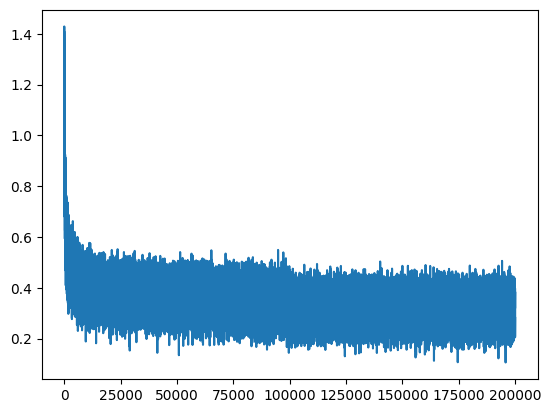

In [85]:
plt.plot(stepi, lossi)

In [96]:
print(Xtr.shape, Ytr.shape)
print(C.shape, W1.shape, b1.shape, W2.shape, b2.shape)
emb = C[Xtr] # (-1, 3, 10)
print(emb.shape)
h = torch.tanh(emb.view(-1, 30) @ W1 + b1) # (-1, 200)
print(h.shape)
logits = h @ W2 + b2 # (-1, 27)
print(logits.shape)
loss = F.cross_entropy(logits, Ytr)
loss

torch.Size([182625, 3]) torch.Size([182625])
torch.Size([27, 10]) torch.Size([30, 200]) torch.Size([200]) torch.Size([200, 27]) torch.Size([27])
torch.Size([182625, 3, 10])
torch.Size([182625, 200])
torch.Size([182625, 27])


tensor(2.1162, grad_fn=<NllLossBackward0>)

In [93]:
emb = C[Xdev] # (32, 3, 2)
h = torch.tanh(emb.view(-1, 30) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2 # (32, 27)
loss = F.cross_entropy(logits, Ydev)
loss

tensor(2.1579, grad_fn=<NllLossBackward0>)

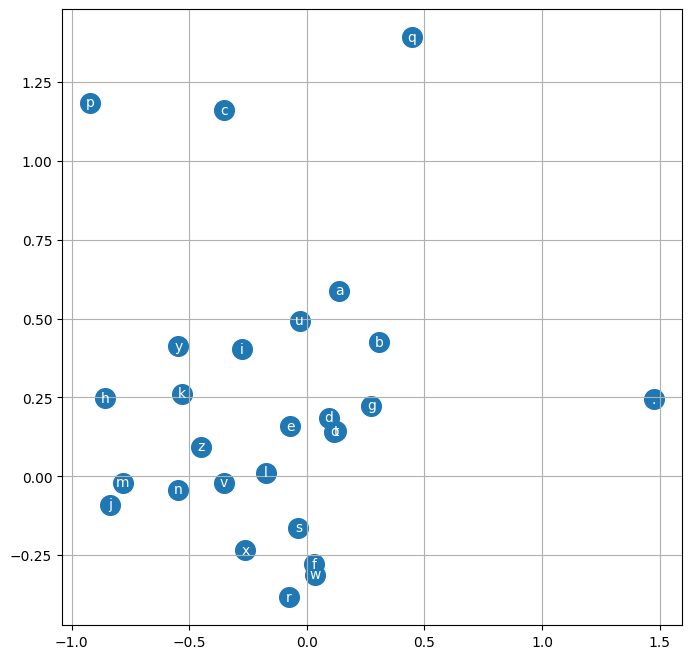

In [88]:
# visualize dimensions 0 and 1 of the embedding matrix C for all characters
plt.figure(figsize=(8,8))
plt.scatter(C[:,0].data, C[:,1].data, s=200)
for i in range(C.shape[0]):
    plt.text(C[i,0].item(), C[i,1].item(), itos[i], ha="center", va="center", color='white')
plt.grid('minor')

In [89]:
# training split, dev/validation split, test split
# 80%, 10%, 10%

In [90]:
context = [0] * block_size
C[torch.tensor([context])].shape

torch.Size([1, 3, 10])

In [91]:


# sample from the model
g = torch.Generator().manual_seed(2147483647 + 10)

for _ in range(20):
    
    out = []
    context = [0] * block_size # initialize with all ...
    while True:
      emb = C[torch.tensor([context])] # (1,block_size,d)
      h = torch.tanh(emb.view(1, -1) @ W1 + b1)
      logits = h @ W2 + b2
      probs = F.softmax(logits, dim=1)
      ix = torch.multinomial(probs, num_samples=1, generator=g).item()
      context = context[1:] + [ix]
      out.append(ix)
      if ix == 0:
        break
    
    print(''.join(itos[i] for i in out))

mora.
kayanniellend.
ryla.
rethan.
brerlei.
azeredielin.
shi.
jen.
eden.
estanar.
kayzion.
kalin.
shubergini.
jest.
jaireneliperteus.
kuya.
gedir.
yarleyeh.
yuma.
muston.
